## In this assingment,i'll use different matplotlib libraries to find the answer of different questions.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [173]:
df=pd.read_csv("kaggle_datasets.csv",parse_dates=['last_updated'])


In [112]:
df['month']=pd.to_datetime(df['last_updated']).dt.strftime('%m')
df

,title,description,url,owner,kernels,discussions,views,downloads,last_updated,license,size,featured,super_featured,upvotes,month
0,Trending YouTube Video Statistics (UPDATED),"Daily statistics (views, likes, category, tags...",https://www.kaggle.com/datasnaek/youtube-new,Mitchell J,3,4,9484,1668,2018-01-16,CC0,3.508768e+07,1,0,46,01
1,7ecb8f4fe2ece9f4c8ffd23af10c310f,NaN,https://www.kaggle.com/veralei/7ecb8f4fe2ece9f...,Vera Lei,0,0,55,2,2018-01-16,Other,1.272644e+08,0,0,0,01
2,Atom Dataset,Dataset with atom features,https://www.kaggle.com/chfly2000/nomad2018-ato...,chfly2000,0,0,26,1,2018-01-16,Other,0.000000e+00,0,0,0,01
3,tmptmp,NaN,https://www.kaggle.com/ilyaivanchenko/tmptmp,snow2011,0,0,12,1,2018-01-16,CC0,1.635900e+06,0,0,0,01
4,Lab 1 Matrix,NaN,https://www.kaggle.com/tjb5670/lab-1-matrix,Tjb5670,0,0,7,1,2018-01-16,CC0,1.800000e+01,0,0,0,01
5,Koppen-Geiger climate classification,A world map shapefile from data observed durin...,https://www.kaggle.com/nighrtwing/koppen-geige...,gabro,0,0,6,0,2018-01-16,Other,7.775660e+05,0,0,1,01
6,Trial Dataset,NaN,https://www.kaggle.com/prashanth1994/trial-dat...,Prashanth Sekar,0,0,5,0,2018-01-16,Other,4.043810e+05,0,0,0,01
7,glove_embedding_weights,NaN,https://www.kaggle.com/zymiao/glove-embedding-...,Zuoyu Miao,0,0,5,0,2018-01-16,CC0,1.378476e+08,0,0,1,01
8,20180116083816,NaN,https://www.kaggle.com/mic771112/20180116083816,Shanger Lin,0,0,5,0,2018-01-16,Other,8.071716e+06,0,0,0,01
9,final_best14,NaN,https://www.kaggle.com/shivrajp/final-best14,Getting_started,0,0,4,1,2018-01-16,CC0,1.841620e+05,0,0,0,01


## Different type of license that owners own

Text(0.5, 1.0, 'Number of license')

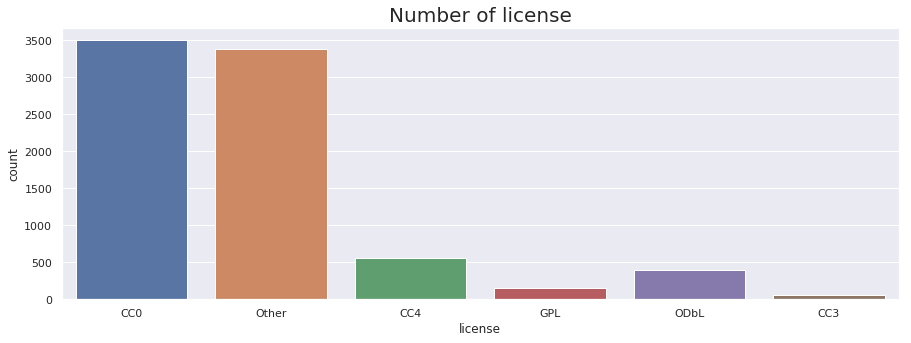

In [118]:
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
ax=sns.countplot(x='license',data=df)
ax.set_title(label='Number of license',fontsize=20)

It is clearly seen that owners with CC0 license are in majority and number of owners owing CC3 license is very less

### How many datasets are downloaded per month every year?

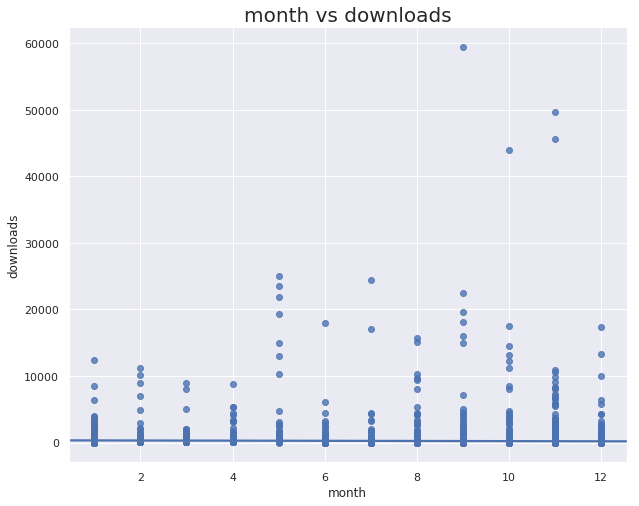

In [143]:
df['month']=pd.to_numeric(df['month'])
plt.figure(figsize=(10,8))
plt.title("month vs downloads",fontsize=20)
sns.regplot(x=df['month'],y=df['downloads'])

Maximum datastes which are downloaded per month every year lies in a range of 0-10000

### Number of views of latest datasets

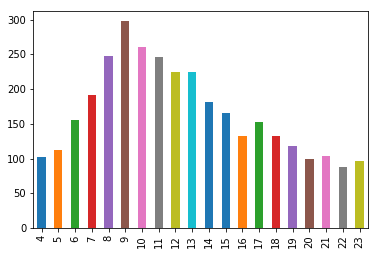

In [15]:
df['views'].value_counts().head(20).sort_index().plot.bar()

In [160]:
f=df[(df['last_updated']>'2015-01-01')&(df['last_updated']<'2015-12-31')]

## How upvotes of datasets varies with months in 2016?

In [17]:
i=df[(df['last_updated']>'2016-01-01')&(df['last_updated']<'2016-12-31')]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


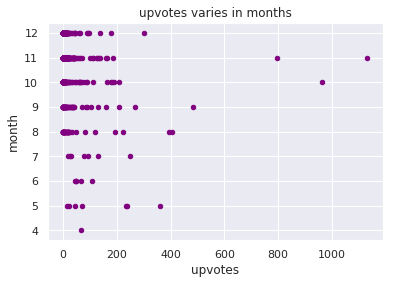

In [166]:
i['month']=pd.to_numeric(i['month'])
i.plot(kind='scatter',x='upvotes',y='month',color='purple',title='upvotes varies in months')
plt.show()

Maximum datasets have upvotes in the range 0-200.

## How many upvoted datasets are discussed as well in 2017?

In [174]:
s=df[(df['last_updated']>'2017-01-01')&(df['last_updated']<'2017-12-31')]

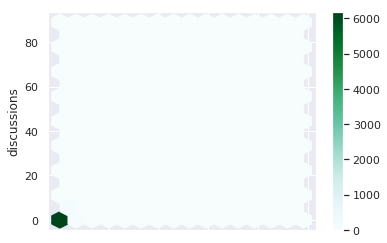

In [194]:
s[s['upvotes']<1000].plot.hexbin(x='upvotes',y='discussions',gridsize=15)

In [188]:
e=df[(df['last_updated']>'2018-01-01')&(df['last_updated']<'2018-12-31')]

### Views vs Downloads in 2018

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


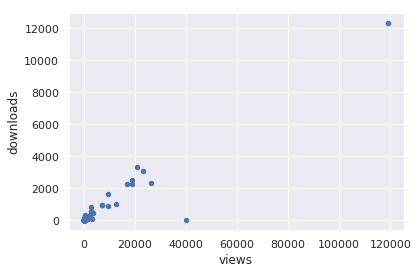

In [190]:
e.plot.scatter(x='views',y='downloads')

Majority of datasets which are downloaded as well as viewed are less than 2000.

### How many datasets are downloaded and viewed as well in 2016?

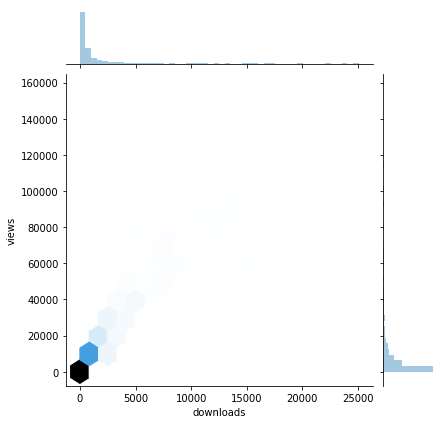

In [34]:
sns.jointplot(x='downloads',y='views',data=i[i['downloads']<40000],kind='hex',gridsize=15)

Maximum number of datasets which are downloaded as well as viewed lies in a range of 0-5000.

### How views of datasets varies with months of every year?

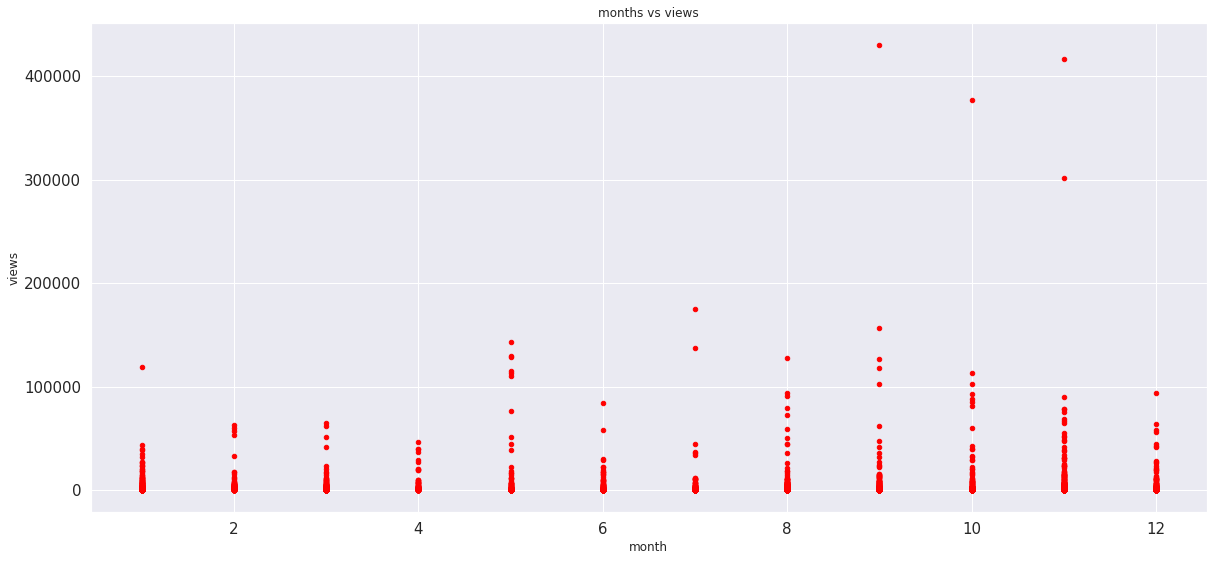

In [146]:
df.plot.scatter(x='month',y='views',figsize=(20,9),color='red',title='months vs views',fontsize=15)

Maximum datasets which are viewed per month of every year lies in a range of 0-100000.

In [72]:
columns=['kernels','views','downloads','size','featured','super_featured','upvotes']
g=df.groupby(['month'])[columns]
g.sum()

,kernels,views,downloads,size,featured,super_featured,upvotes
month,,,,,,,
01,3241,1144405,135991,1.086324e+11,107,3,3809
02,1934,622497,81672,1.150166e+10,60,1,1712
03,1721,680255,71870,3.084725e+10,55,0,1671
04,1133,516770,64259,1.859903e+10,42,1,1625
05,4072,1277802,176730,3.618397e+10,46,0,3213
06,1360,604658,72664,3.561490e+10,57,1,1787
07,2006,783672,94053,4.609589e+10,92,1,2578
08,4189,1517097,180666,1.103050e+11,225,0,5090
09,8491,1950041,261716,4.817344e+10,183,3,6042


In [119]:
md={
    'month':['01','02','03','04','05','06','07','08','09','10','11','12'],
    'total_kernels':[3241,1934,1721,1133,4072,1360,2006,4189,8491,5644,8982,3231],
    'total_views':[1144405,622497,680255,516770,1277802,604658,783672,1517097,1950041,1787613,28267946,1056929],
    'total_downloads':[135991,81672,71870,64259,176730,72664,94053,180666,261716,210355,358125,124072],
    'total_size':[1.086324e+11,1.150166e+10,3.084725e+10,1.859903e+10,3.618397e+10,3.561490e+10,4.609589e+10,1.103050e+11,4.817344e+10,6.964245e+10,1.699471e+11,3.603498e+12],
    'total_featured':[107,60,55,42,46,57,92,225,183,95,174,117],
    'total_sfeatured':[3,1,0,1,0,1,1,0,3,1,7,2],
    'total_upvotes':[3809,1712,1671,1625,3213,1787,2578,5090,6042,4826,8364,3475]
     }  
m_df=pd.DataFrame(md)
m_df

,month,total_kernels,total_views,total_downloads,total_size,total_featured,total_sfeatured,total_upvotes
0,01,3241,1144405,135991,1.086324e+11,107,3,3809
1,02,1934,622497,81672,1.150166e+10,60,1,1712
2,03,1721,680255,71870,3.084725e+10,55,0,1671
3,04,1133,516770,64259,1.859903e+10,42,1,1625
4,05,4072,1277802,176730,3.618397e+10,46,0,3213
5,06,1360,604658,72664,3.561490e+10,57,1,1787
6,07,2006,783672,94053,4.609589e+10,92,1,2578
7,08,4189,1517097,180666,1.103050e+11,225,0,5090
8,09,8491,1950041,261716,4.817344e+10,183,3,6042
9,10,5644,1787613,210355,6.964245e+10,95,1,4826


### Total views in every month of every year

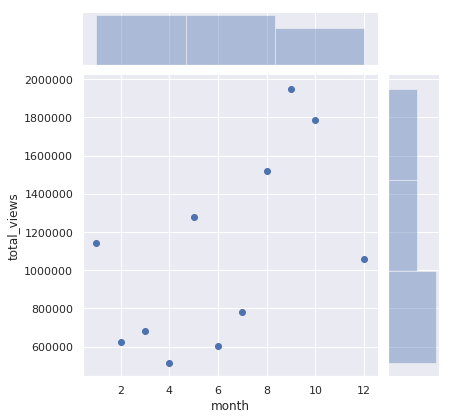

In [133]:
m_df['month']=pd.to_numeric(m_df['month'])
m=m_df['total_views'].max()
sns.jointplot(x='month',y='total_views',data=m_df[m_df['total_views']<m])

This plot shows the total views of each month and how it varies.

### Featured vs super featured datasets in each months of every year

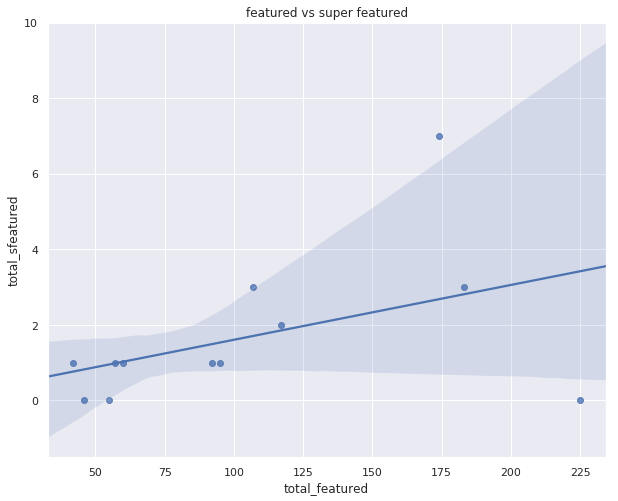

In [128]:
plt.figure(figsize=(10,8))
plt.title("featured vs super featured")
sns.regplot(x=m_df['total_featured'],y=m_df['total_sfeatured'])

### How total downloads of datasets varies in each month of every year?

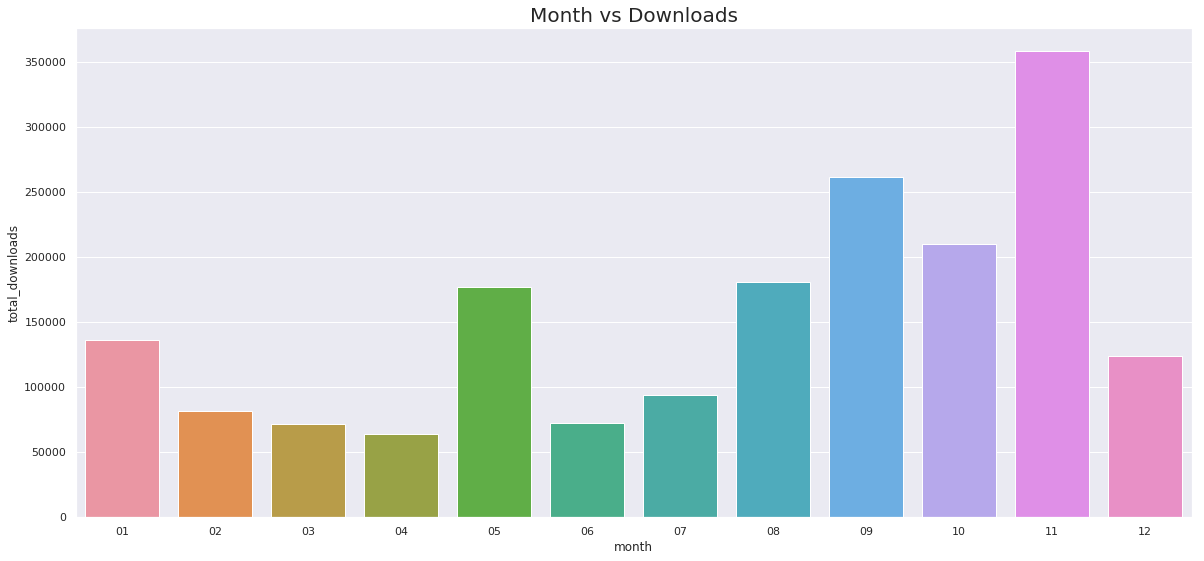

In [129]:
plt.figure(figsize=(20,9))
plt.title("Month vs Downloads",fontsize=20)
sns.barplot(x=m_df['month'],y=m_df['total_downloads'])

Maximum datasets are downloaded in the month of november.

### How total views of datasets varies every month for all the four years?

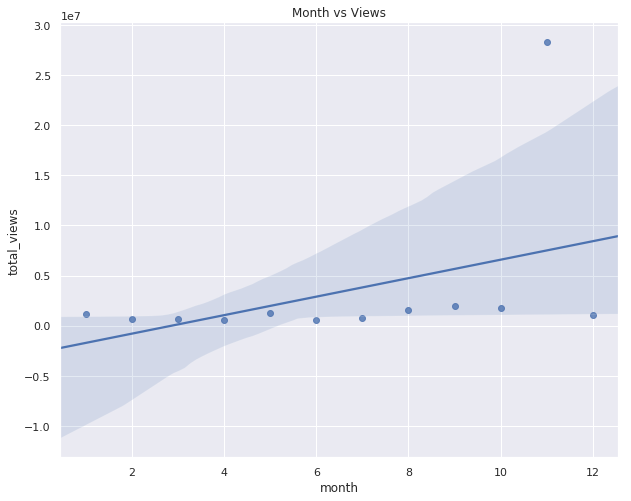

In [140]:
plt.figure(figsize=(10,8))
plt.title("Month vs Views")
sns.regplot(x=m_df['month'],y=m_df['total_views'])